**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo número ( A  )

---


Aluno(a): Alison Pereira Ribeiro

---

Aluna(o): Leidiane Beatriz Passos Rodrigues

---

Aluno(a): Thiago de Andrade Corrêa

---

#Especificação do problema : Lógica nebulosa


A partir da base de dados disponibilizada anteriormente, projetar e implementar  um sistema nebuloso para classificar alunos do curso de Ciência da Computação. A classificação deverá ser feita incrementalmente do primeiro ao último período, e os resultados mostrados em um gráfico. Deve ser possível observar o desempenho de um aluno específico e também de todos os alunos em conjunto.

Para isso, defina as variáveis nebulosas descritas a seguir. As variáveis devem ter 3 faixas de valores.

**Entrada**:

- Média em disciplinas de programação
- Média em disciplinas básicas de matemática
- Média em disciplinas do núcleo específico
- Média em disciplinas do núcleo comum
- Quantidade de reprovações  em disciplinas de programação
- Quantidade de reprovações em disciplinas básicas de matemática
- Quantidade de reprovações em disciplinas do núcleo específico
- Quantidade de reprovações em disciplinas do núcleo comum
- Quantidade de trancamentos

**Saída**:

    Classificação do aluno.


**Observação**: O trabalho deve ser feito em grupo, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho e a contribuição de cada membro deverá ser devidamente identificado


#Planejamento de atividades

Utilizar a ferramenta  [Trello](https://trello.com )  para organizar o trabalho, distribuindo as tarefas e registrando (EXPLICITAMENTE) as interações entre os membros do grupo.

- Eleger um gerente de projeto para organizar as atividades no Trello e coordenar a equipe.
- Planejar o que deve ser feito, distribuindo equitativamente as atividades entre os membros do grupo. Estabelecer atividades a serem feitas, prazos para sua entrega e produtos a serem entregues para cada atividade.

- O planejamento das atividades deve, necessariamente incluir:
  - Cronograma do trabalho a ser realizado.
  - Associação das tarefas a serem realizadas a quem deverá realizá-las.
  - Cada tarefa deve estar associada a um produto a ser entregue.
  - Em todos os dias devem ser atribuídas atividades a todos os membros do grupo.
  
- **O planejamento deve ser entregue na primeira aula em que o tópico for trabalhado**.



# Descrição do modelo

Para resolvermos o problema proposto iremos utilizar a lógica nebulosa. A lógica nebulosa é uma teoria que generaliza a teoria clássica dos conjuntos para permitir que objetos possuam graus de pertinência, onde o grau de pertinência é  à determinados conjuntos, possibilitando assim a representação de conceitos vagos e imprecisos, porém mantendo a precisão matemática no tratamento. O grau de pertinência de um elemento de um universo à um determinado conjunto é representado por um número real no intervalo [0,1], que representa o quão verdadeira é a afirmação de que este elemento pertence a este conjunto. Uma variavél nebulosa modela termos subjetivos da linguagem natural, dessa forma podemos processar o conhecimento extraido. 
  As variavéis nebulosas utilizadas para este problema são:
  
          Média em disciplinas de programação - MDP;
          Média em disciplinas básicas de matemática - MDBM;
          Média em disciplinas do núcleo específico - MDNE;
          Média em disciplinas do núcleo comum - MDNC;
          Quantidade de reprovações em disciplinas de programação - QRP
          Quantidade de reprovações em disciplinas básicas de matemática - QRM;
          Quantidade de reprovações em disciplinas do núcleo específico - QE;
          Quantidade de reprovações em disciplinas do núcleo comum - QRC;
          Quantidade de trancamentos - QT;
          
   Para classificar um aluno iremos utilizar os seguintes classificadores:
   
          Ruim
          Mediano
          Bom
          Excelente 
          
  
    
  
  

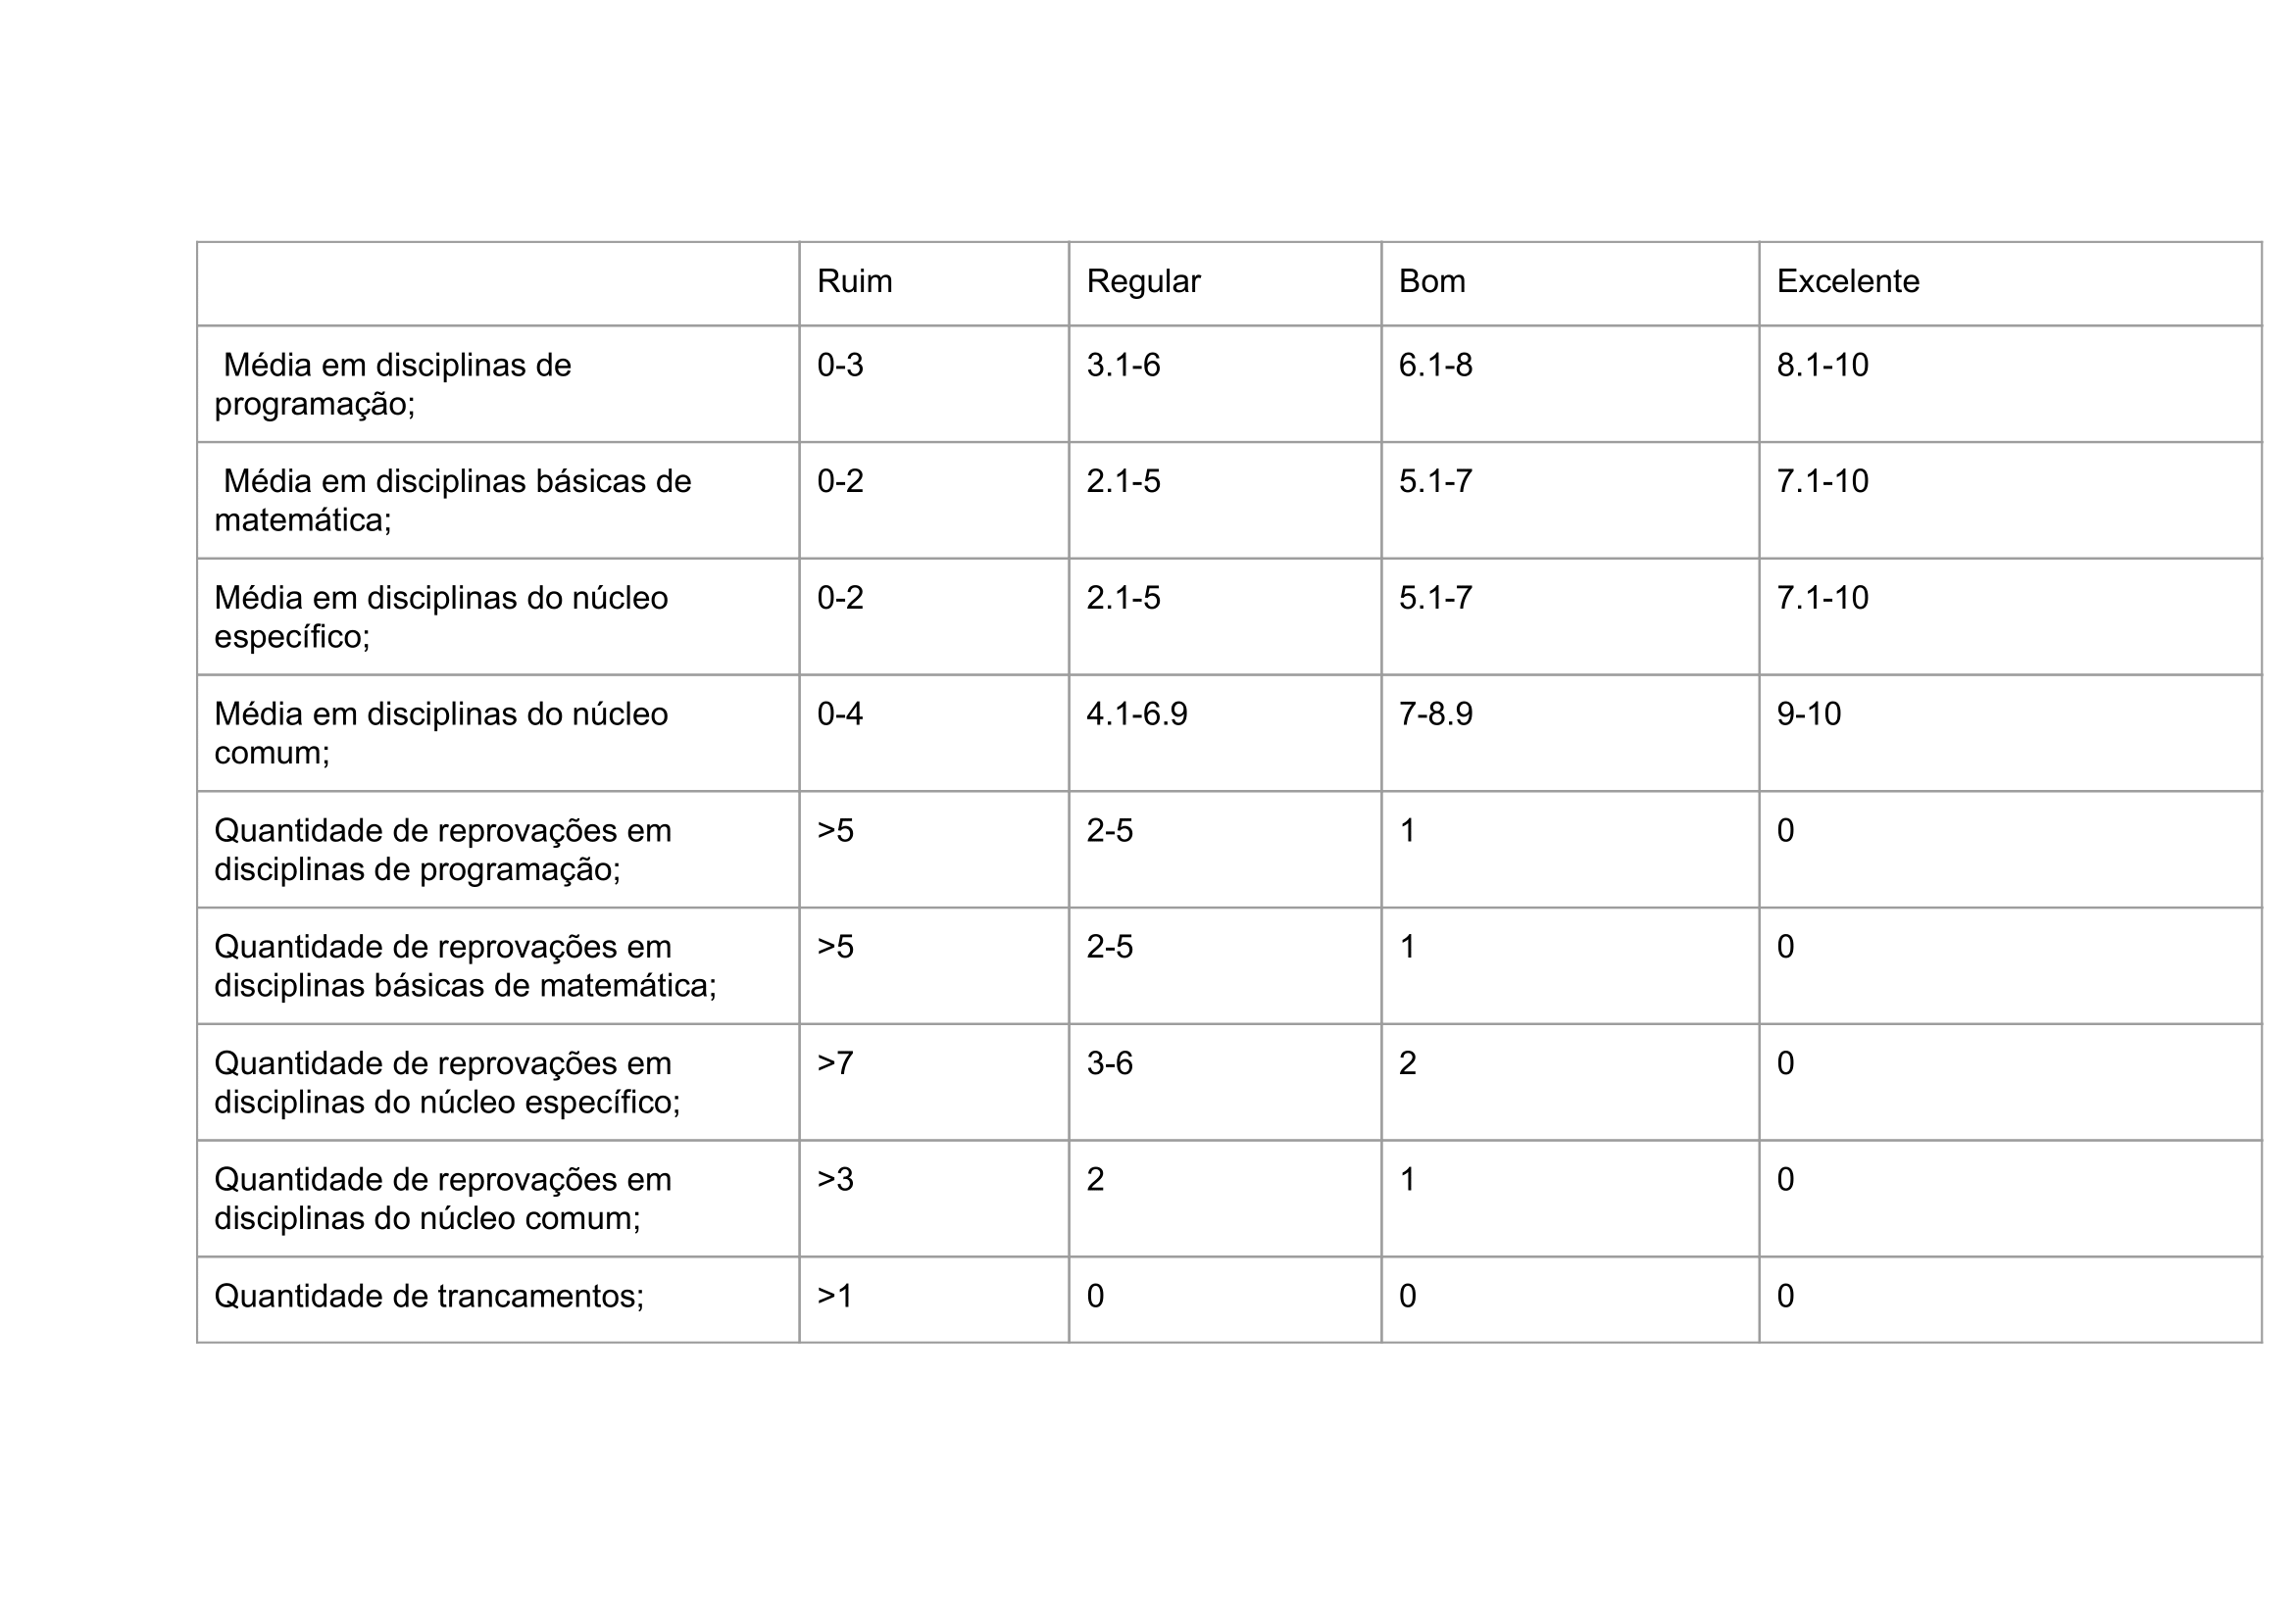

In [0]:
from IPython.display import Image
Image('Documento sem título-1.png', width=1000, height=650)

Para efeitos de síntese ocultamos as siglas, portanto considere MD como a disjunção das Médias de Disciplinas, QT como a Quantidade de Trancamento e QR como a disjunção das Quantidades de Reprovação.

A fuzzyficação ocorreu conforme tabela acima, escolhemos as faixas de valores e classificamos segundo especificado. Os valores defuzzyficados serão as classes geradas posteriormente.

**Observação**: Poderão ser utilizados códigos de outros autores, desde que sejam feitos os devidos créditos aos mesmos. Nesse caso, esses códigos devem ser devidamente documentado, pelo grupo, além da documentação fornecida pelos seus autores. Deve ficar muito claro como o código utilizado foi utilizado para resolver o problema em questão.

In [4]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/f9/0e/a8de3e98e64bbf828f5e762936ff5a40e72331dbe663470711
Successfully built scikit-fuzzy


## Preparando os dados

In [0]:
# Carregando a base dados
from google.colab import files
uploaded = files.upload()

Saving baseDeDados.csv to baseDeDados.csv


In [0]:
import pandas as pd

# A base de dados abaixo será utilizada para o treinamento e teste da rede bayesiana
dataset = pd.read_csv('baseDeDados.csv', sep=';')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Elimina as colunas indesejadas
data = dataset.drop(['idade_conclusao_ensino_medio',
       'uf_naturalidade_discente', 'discente_estudou_escola_publica?',
       'ano_conclusao_ensino_medio', 'nome_municipio_curso',
       'nome_campus_curso', 'nome_curso', 'grau_academico', 'modalidade',
       'turno', 'ingresso_judicial?', 'forma_ingresso',
       'especificidade_ingresso_ps', 'categoria_ingresso_ps',
       'opcao_participacao_ps', 'opcao_aprovacao_ps', 'nota_liguagem_enem',
       'nota_ciencias_humanas_enem', 'nota_ciencias_natureza_enem',
       'nota_matematica_enem', 'nota_redacao_enem', 'nota_linguagem_sisu',
       'nota_ciencias_humanas_sisu', 'nota_ciencias_natureza_sisu',
       'nota_matematica_sisu', 'nota_redacao_sisu', 'nota_no_curso_sisu',
       'nota_corte_curso_sisu','ch_total_integralizada_discente', 'discente_percentual_integralizacao',
       'codigo_matriz_curricular','ch_total_minima_matriz_curricular',
       'ch_maxima_semestre_matriz_curricular',
       'prazo_conclusao_minino_matriz_curricular',
       'prazo_conclusao_medio_matriz_curricular',
       'prazo_conclusao_maximo_matriz_curricular',
       'matriz_semestre_previsto_cursar_compomente', 'codigo_turma_componente',
       'ano_periodo_oferta_turma', 'turma_ead?',
       'ano_periodo_cursado_componente', 'semestre_previsto_componente',
       'ch_total_componente', 'frequencia_discente_componente',
       'ano_nascimento_discente', 'ano_periodo_ingresso',
       'ano_periodo_inativacao', 'motivo_inativacao', 'data_inativacao',
       'data_colacao_grau', 'media_global_atual_matriz_curricular', 'semestre_cursado',
       'codigo_componente', 'idade_ingresso_universidade', 'idade_colacao_grau'], axis=1)

In [0]:
data.head()

,id,situacao_discente,media_global_atual_discente,nome_componente,nota_discente_componente,situacao_discente_componente,quantidade_trancamentos,quantidade_reprovacoes_nc,quantidade_reprovacoes_nl,quantidade_reprovacoes_neobr,quantidade_reprovacoes_neopt
0,1,GRADUADO,5.01,CÁLCULO 1,7.3,AP,1.0,6.0,9.0,10.0,NaN
1,1,GRADUADO,5.01,LÓGICA MATEMÁTICA,6.8,AP,1.0,6.0,9.0,10.0,NaN
2,1,GRADUADO,5.01,MATEMÁTICA DISCRETA,5.0,AP,1.0,6.0,9.0,10.0,NaN
3,1,GRADUADO,5.01,FÍSICA PARA COMPUTAÇÃO,5.0,AP,1.0,6.0,9.0,10.0,NaN
4,1,GRADUADO,5.01,ÁLGEBRA LINEAR,4.2,RM,1.0,6.0,9.0,10.0,NaN


In [0]:
disc_pro = list(['PRGRAMAÇÃO DE COMPUTADORES 1 CN', 'PRGRAMAÇÃO DE COMPUTADORES 2 CN', 'ESTRUTURAS DE DADOS I', 'ESTRUTURAS DE DADOS II',
                 'PROGRAMAÇÃO ORIENTADA A OBJETOS'])

disc_mat = list(['CÁLCULO 1', 'ÁLGEBRA LINEAR', 'CÁLCULO 2', 'FÍSICA PARA COMPUTAÇÃO', 'MATEMÁTICA DISCRETA', 'PROBABILIDADE E ESTATÍSTICA'])

disc_ne  = list(['BANCO DE DADOS', 'INTELIGÊNCIA ARTIFICIAL', 'ENGENHARIA DE SOFTWARE' 'REDES DE COMPUTADORES 1', 'REDES DE COMPUTADORES 2', 
                'SISTEMAS GERENCIADORES DE BD', 'SISTEMAS DISTRIBUÍDOS', 'ENGENHARIA DE REQUISITOS', 'LINGUAGENS FORMAIS E AUTÔMATOS',
                'PROJETO DE SOFTWARE', 'TEORIA DA COMPUTAÇÃO', 'COMPUTAÇÃO GRÁFICA', 'TÓPICOS 1', 'TÓPICOS 2', 'PROJETO FINAL DE CURSO 1',
                'PROJETO FINAL DE CURSO 2', 'MULTIMÍDIA'])

disc_nc = list(['PRGRAMAÇÃO DE COMPUTADORES 1 CN', 'PRGRAMAÇÃO DE COMPUTADORES 2 CN', 'ESTRUTURAS DE DADOS I', 'ESTRUTURAS DE DADOS II',
                'PROGRAMAÇÃO ORIENTADA A OBJETOS', 'CÁLCULO 1', 'ÁLGEBRA LINEAR', 'CÁLCULO 2', 'FÍSICA PARA COMPUTAÇÃO', 'MATEMÁTICA DISCRETA',
                'PROBABILIDADE E ESTATÍSTICA', 'LÓGICA MATEMÁTICA', 'SISTEMAS DIGITAIS', 'ARQUITETURA DE COMPUTADORES', 'TEORIA DOS GRAFOS',
                'LINGUAGENS DE PROGRAMAÇÃO', 'ANÁLISE E PROJETO DE ALGORITMO', 'PESQUISA OPERACIONAL', 'SISTEMAS OPERACIONAIS 1',
                'SISTEMAS OPERACIONAIS 2', 'COMPILADORES', 'COMPUTADOR E SOCIEDADE', 'SEGURANÇA E AUDITORIA DE SISTEMAS', 'DIREITO',
                'EMPREENDEDORISMO'])

In [0]:
class Preprocessamento:
    def __init__(self, data):
        self.lista_id = []               # Lista de id's dos alunos
        self.lista_num_reprovacoes = []  # Lista do número de reprovações
        self.data = data                 # DataFrame com os dados dos alunos
        self.data_frame = None
        self.modelo = None
        
        # Variáveis nebulosas
        self.mdp = None
        self.mdbm = None
        self.mdne = None
        self.mdnc = None
        self.qrp = None
        self.qrm = None
        self.qe = None
        self.qrc = None
        self.qt = None
                
    def captura_ids_alunos(self):
        # Número de alunos que se formaram
        self.lista_id = [] # Lista que guarda os id's eliminando repetições
        for i in self.data.id:
            if i not in self.lista_id:
                self.lista_id.append(i)
                
    def obtem_medias(self):
        self.mdp  = [0.0 for _ in range(len(self.lista_id))]
        self.mdbm = [0.0 for _ in range(len(self.lista_id))]
        self.mdne = [0.0 for _ in range(len(self.lista_id))]
        self.mdnc = [0.0 for _ in range(len(self.lista_id))]
               
        for i in range(len(self.lista_id)):
            df = data[data.id == self.lista_id[i]]
            
            # Média em disciplinas de programação - MDP
            for disc in disc_pro:
                if disc in list(df.nome_componente):
                    d = df[df.nome_componente == disc]
                    d = d[d.situacao_discente_componente == 'AP']
                    x = list(d.nota_discente_componente.values)
                    if x == []:
                        x.append(0.0)
                    self.mdp[i] += x[0]
                    
            self.mdp[i] = self.mdp[i] / len(disc_pro) # Divide pelo número de disciplinas de programação
            
            # Média em disciplinas básicas de matemática - MDBM
            for disc in disc_mat:
                if disc in list(df.nome_componente):
                    d = df[df.nome_componente == disc]
                    d = d[d.situacao_discente_componente == 'AP']
                    x = list(d.nota_discente_componente.values)
                    if x == []:
                        x.append(0.0)
                    self.mdbm[i] += x[0]
                    
            self.mdbm[i] = self.mdbm[i] / len(disc_mat) # Divide pelo número de disciplinas básicas de matemática
            
            # Média em disciplinas do núcleo específico - MDNE
            for disc in disc_ne:
                if disc in list(df.nome_componente):
                    d = df[df.nome_componente == disc]
                    d = d[d.situacao_discente_componente == 'AP']
                    x = list(d.nota_discente_componente.values)
                    if x == []:
                        x.append(0.0)
                    self.mdne[i] += x[0]
                    
            self.mdne[i] = self.mdne[i] / len(disc_ne) # Divide pelo número de disciplinas do núcleo específico
            
            # Média em disciplinas do núcleo comum - MDNC
            for disc in disc_nc:
                if disc in list(df.nome_componente):
                    d = df[df.nome_componente == disc]
                    d = d[d.situacao_discente_componente == 'AP']
                    x = list(d.nota_discente_componente.values)
                    if x == []:
                        x.append(0.0)
                    self.mdnc[i] += x[0]
                    
            self.mdnc[i] = self.mdnc[i] / len(disc_nc) # Divide pelo número de disciplinas do núcleo comum
    
    def obtem_reprovacoes(self):
        self.qrp = [0 for _ in range(len(self.lista_id))]
        self.qrm = [0 for _ in range(len(self.lista_id))]
        self.qe  = [0 for _ in range(len(self.lista_id))]
        self.qrc = [0 for _ in range(len(self.lista_id))]
        self.qt  = [0 for _ in range(len(self.lista_id))]
        
        for i in range(len(self.lista_id)):
            df = data[data.id == self.lista_id[i]]
            
            # Quantidade de reprovações em disciplinas de programação - QRP
            for disc in disc_pro:
                if disc in list(df.nome_componente):
                    d = df[df.nome_componente == disc]
                    d = d[d.situacao_discente_componente != 'AP']
                    numero_rep = d.shape[0]
                    self.qrp[i] += numero_rep
                    
            # Quantidade de reprovações em disciplinas básicas de matemática - QRM
            for disc in disc_mat:
                if disc in list(df.nome_componente):
                    d = df[df.nome_componente == disc]
                    d = d[d.situacao_discente_componente != 'AP']
                    numero_rep = d.shape[0]
                    self.qrm[i] += numero_rep 
                    
            # Quantidade de reprovações em disciplinas do núcleo específico - QE
            for disc in disc_ne:
                if disc in list(df.nome_componente):
                    d = df[df.nome_componente == disc]
                    d = d[d.situacao_discente_componente != 'AP']
                    numero_rep = d.shape[0]
                    self.qe[i] += numero_rep 
                    
            # Quantidade de reprovações em disciplinas do núcleo comum - QRC
            for disc in disc_nc:
                if disc in list(df.nome_componente):
                    d = df[df.nome_componente == disc]
                    d = d[d.situacao_discente_componente != 'AP']
                    numero_rep = d.shape[0]
                    self.qrc[i] += numero_rep
                    
            # Quantidade de trancamentos - QT
            import numpy as np
            d = df.drop_duplicates(subset='id', keep='first', inplace=False)
            numero_rep = d.quantidade_trancamentos.values[0]
            if str(numero_rep) == str(np.nan):
                numero_rep = 0
            self.qt[i] += int(numero_rep)    
    
    def constroi_modelo(self):
        keys = ['id', 'MDP', 'MDBM', 'MDNE', 'MDNC', 'QRP', 'QRM', 'QE', 'QRC', 'QT']
        self.modelo = dict.fromkeys(keys)
        
        self.modelo['id'] = self.lista_id
        self.modelo['MDP'] = self.mdp
        self.modelo['MDBM'] = self.mdbm
        self.modelo['MDNE'] = self.mdne
        self.modelo['MDNC'] = self.mdnc
        self.modelo['QRP'] = self.qrp
        self.modelo['QRM'] = self.qrm
        self.modelo['QE'] = self.qe
        self.modelo['QRC'] = self.qrc
        self.modelo['QT'] = self.qt
        
        self.modelo = pd.DataFrame(self.modelo, columns=keys) 

In [0]:
# Só pega alunos GRADUADOS
data_grad = data[data.situacao_discente == 'GRADUADO']

In [0]:
# Objeto do dataframe dos alunos graduados
grad   = Preprocessamento(data_grad)

# Preparando os dados dos alunos GRADUADOS
grad.captura_ids_alunos()  # Função que captura dos id's dos alunos ignorando repetições
grad.obtem_medias()        # Função que obtém as médias das disciplinas especificadas nas variáveis nebulosas
grad.obtem_reprovacoes()   # Função que obtém as reprovações especificadas nas variáveis nebulosas
grad.constroi_modelo()    # Função que constrói o modelo final
data_grad = grad.modelo

In [0]:
data_grad.head()  #CRIANDO AS COLUNAS QUE SERVIRÃO DE BASE PARA A APLICAÇÃO DA LÓGICA FUZZY

,id,MDP,MDBM,MDNE,MDNC,QRP,QRM,QE,QRC,QT
0,1,3.20,4.900000,5.65625,5.456,1,1,9,6,1
1,2,3.48,6.400000,6.55625,5.572,0,1,0,2,0
2,3,4.58,6.300000,7.41250,6.548,0,3,0,4,0
3,5,4.00,5.300000,6.09375,5.656,1,1,1,4,0
4,6,3.30,5.316667,6.86875,5.556,0,1,0,2,0


In [0]:
data_grad.shape

(170, 10)

## Aplicação da Lógica Fuzzy

In [0]:
import numpy as np
import skfuzzy as fuzz

In [0]:
# Gera as variáveis do universo
x_mdp  = np.arange(0, 11, 1)
x_mdbm = np.arange(0, 11, 1)
x_mdne = np.arange(0, 11, 1)
x_mdnc = np.arange(0, 11, 1)
x_qrp  = np.arange(0, 11, 1)
x_qrm  = np.arange(0, 11, 1)
x_qe   = np.arange(0, 11, 1)
x_qrc  = np.arange(0, 11, 1)
x_qt   = np.arange(0, 11, 1)

x_tip  = np.arange(0, 11, 1)

In [0]:
# Gera as funções de pertinência nebulosas

# * Média em disciplinas de programação - MDP
mdp_ruim      = fuzz.trimf(x_mdp, [0, 0, 3])
mdp_regular   = fuzz.trimf(x_mdp, [0, 3.1, 6])
mdp_bom       = fuzz.trimf(x_mdp, [0, 6.1, 8])
mdp_excelente = fuzz.trimf(x_mdp, [8.1, 10, 10])

# * Média em disciplinas básicas de matemática - MDBM
mdbm_ruim      = fuzz.trimf(x_mdbm, [0, 0, 2])
mdbm_regular   = fuzz.trimf(x_mdbm, [0, 2.1, 5])
mdbm_bom       = fuzz.trimf(x_mdbm, [0, 5.1, 8])
mdbm_excelente = fuzz.trimf(x_mdbm, [7.1, 10, 10])

# * Média em disciplinas do núcleo específico - MDNE
mdne_ruim      = fuzz.trimf(x_mdne, [0, 0, 2])
mdne_regular   = fuzz.trimf(x_mdne, [0, 2.1, 5])
mdne_bom       = fuzz.trimf(x_mdne, [0, 5.1, 7])
mdne_excelente = fuzz.trimf(x_mdne, [7.1, 10, 10])

# * Média em disciplinas do núcleo comum - MDNC
mdnc_ruim      = fuzz.trimf(x_mdnc, [0, 0, 4])
mdnc_regular   = fuzz.trimf(x_mdnc, [0, 4.1, 6.9])
mdnc_bom       = fuzz.trimf(x_mdnc, [0, 7, 8.9])
mdnc_excelente = fuzz.trimf(x_mdnc, [9, 10, 10])

# * Quantidade de reprovações em disciplinas de programação - QRP
qrp_ruim      = fuzz.trimf(x_qrp, [0, 0, 6])
qrp_regular   = fuzz.trimf(x_qrp, [0, 2, 5])
qrp_bom       = fuzz.trimf(x_qrp, [0, 0.1, 1])
qrp_excelente = fuzz.trimf(x_qrp, [0, 0, 0])

# * Quantidade de reprovações em disciplinas básicas de matemática - QRM
qrm_ruim      = fuzz.trimf(x_qrp, [0, 0, 6])
qrm_regular   = fuzz.trimf(x_qrp, [0, 2, 5])
qrm_bom       = fuzz.trimf(x_qrp, [0, 0.1, 1])
qrm_excelente = fuzz.trimf(x_qrp, [0, 0, 0])

# * Quantidade de reprovações em disciplinas do núcleo específico - QE
qe_ruim      = fuzz.trimf(x_qrp, [0, 0, 7])
qe_regular   = fuzz.trimf(x_qrp, [0, 3, 6])
qe_bom       = fuzz.trimf(x_qrp, [0, 0.1, 2])
qe_excelente = fuzz.trimf(x_qrp, [0, 0, 0])

# * Quantidade de reprovações em disciplinas do núcleo comum - QRC
qrc_ruim      = fuzz.trimf(x_qrp, [0, 0, 3])
qrc_regular   = fuzz.trimf(x_qrp, [0, 1, 2])
qrc_bom       = fuzz.trimf(x_qrp, [0, 0.1, 1])
qrc_excelente = fuzz.trimf(x_qrp, [0, 0, 0])

# * Quantidade de trancamentos - QT
qt_ruim      = fuzz.trimf(x_qt, [0, 0, 1])
qt_regular   = fuzz.trimf(x_qt, [0, 0, 0])
qt_bom       = fuzz.trimf(x_qt, [0, 0, 0])
qt_excelente = fuzz.trimf(x_qt, [0, 0, 0])

# **************************************************************************** #
tip_ruim      = fuzz.trimf(x_mdp, [0, 0, 3])
tip_regular   = fuzz.trimf(x_mdp, [0, 3.1, 6])
tip_bom       = fuzz.trimf(x_mdp, [0, 6.1, 8])
tip_excelente = fuzz.trimf(x_mdp, [8.1, 10, 10])

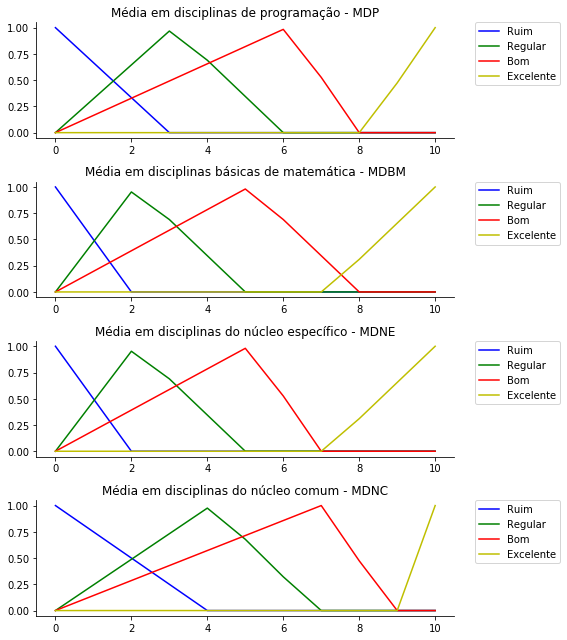

In [0]:
import matplotlib.pyplot as plt

# Visualiza os universos e as funções de pertinência
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_mdp, mdp_ruim, 'b', linewidth=1.5, label='Ruim')
ax0.plot(x_mdp, mdp_regular, 'g', linewidth=1.5, label='Regular')
ax0.plot(x_mdp, mdp_bom, 'r', linewidth=1.5, label='Bom')
ax0.plot(x_mdp, mdp_excelente, 'y', linewidth=1.5, label='Excelente')
ax0.set_title('Média em disciplinas de programação - MDP')
ax0.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.plot(x_mdbm, mdbm_ruim, 'b', linewidth=1.5, label='Ruim')
ax1.plot(x_mdbm, mdbm_regular, 'g', linewidth=1.5, label='Regular')
ax1.plot(x_mdbm, mdbm_bom, 'r', linewidth=1.5, label='Bom')
ax1.plot(x_mdbm, mdbm_excelente, 'y', linewidth=1.5, label='Excelente')
ax1.set_title('Média em disciplinas básicas de matemática - MDBM')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax2.plot(x_mdne, mdne_ruim, 'b', linewidth=1.5, label='Ruim')
ax2.plot(x_mdne, mdne_regular, 'g', linewidth=1.5, label='Regular')
ax2.plot(x_mdne, mdne_bom, 'r', linewidth=1.5, label='Bom')
ax2.plot(x_mdne, mdne_excelente, 'y', linewidth=1.5, label='Excelente')
ax2.set_title('Média em disciplinas do núcleo específico - MDNE')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax3.plot(x_mdnc, mdnc_ruim, 'b', linewidth=1.5, label='Ruim')
ax3.plot(x_mdnc, mdnc_regular, 'g', linewidth=1.5, label='Regular')
ax3.plot(x_mdnc, mdnc_bom, 'r', linewidth=1.5, label='Bom')
ax3.plot(x_mdnc, mdnc_excelente, 'y', linewidth=1.5, label='Excelente')
ax3.set_title('Média em disciplinas do núcleo comum - MDNC')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Desativa os eixos superior e da direita
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

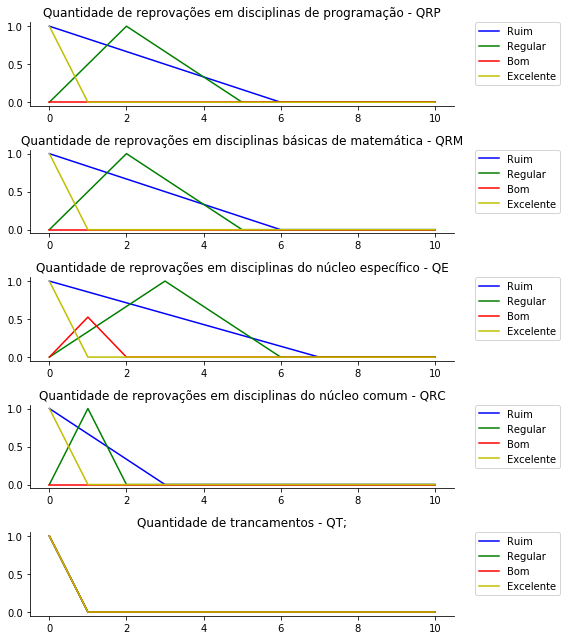

In [0]:
# Visualiza os universos e as funções de pertinência
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(8, 9))

ax0.plot(x_qrp, qrp_ruim, 'b', linewidth=1.5, label='Ruim')
ax0.plot(x_qrp, qrp_regular, 'g', linewidth=1.5, label='Regular')
ax0.plot(x_qrp, qrp_bom, 'r', linewidth=1.5, label='Bom')
ax0.plot(x_qrp, qrp_excelente, 'y', linewidth=1.5, label='Excelente')
ax0.set_title('Quantidade de reprovações em disciplinas de programação - QRP')
ax0.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.plot(x_qrm, qrm_ruim, 'b', linewidth=1.5, label='Ruim')
ax1.plot(x_qrm, qrm_regular, 'g', linewidth=1.5, label='Regular')
ax1.plot(x_qrm, qrm_bom, 'r', linewidth=1.5, label='Bom')
ax1.plot(x_qrm, qrm_excelente, 'y', linewidth=1.5, label='Excelente')
ax1.set_title('Quantidade de reprovações em disciplinas básicas de matemática - QRM')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax2.plot(x_qe, qe_ruim, 'b', linewidth=1.5, label='Ruim')
ax2.plot(x_qe, qe_regular, 'g', linewidth=1.5, label='Regular')
ax2.plot(x_qe, qe_bom, 'r', linewidth=1.5, label='Bom')
ax2.plot(x_qe, qe_excelente, 'y', linewidth=1.5, label='Excelente')
ax2.set_title('Quantidade de reprovações em disciplinas do núcleo específico - QE')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax3.plot(x_qrc, qrc_ruim, 'b', linewidth=1.5, label='Ruim')
ax3.plot(x_qrc, qrc_regular, 'g', linewidth=1.5, label='Regular')
ax3.plot(x_qrc, qrc_bom, 'r', linewidth=1.5, label='Bom')
ax3.plot(x_qrc, qrc_excelente, 'y', linewidth=1.5, label='Excelente')
ax3.set_title('Quantidade de reprovações em disciplinas do núcleo comum - QRC')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax4.plot(x_qt, qt_ruim, 'b', linewidth=1.5, label='Ruim')
ax4.plot(x_qt, qt_regular, 'g', linewidth=1.5, label='Regular')
ax4.plot(x_qt, qt_bom, 'r', linewidth=1.5, label='Bom')
ax4.plot(x_qt, qt_excelente, 'y', linewidth=1.5, label='Excelente')
ax4.set_title('Quantidade de trancamentos - QT;')
ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Desativa os eixos superior e da direita
for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

**Regras Nebulosas**

( SE o **MDP** foi excelente E **QRC** foi excelente) ENTÃO o **aluno** será excelente.

---
---
( SE o **MDP** foi bom E **QRC** foi ruim) 
ENTÃO o **aluno** será regular.

---
---
   
( SE o **MDP** foi ruim E **QRC** foi excelente) 
ENTÃO o **aluno** será ruim.

---
---

( SE o **MDP** foi bom)
 ENTÃO o **aluno** será bom.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5621fd8160>)

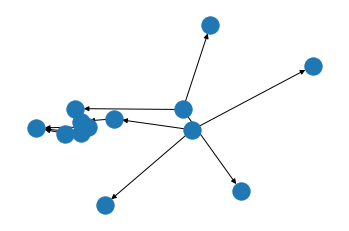

In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

media = ctrl.Antecedent(np.arange(0, 11, 1), 'media') #variável do tipo 'quality'
reprovacao = ctrl.Antecedent(np.arange(0, 11, 1), 'reprovacao')
trancamento = ctrl.Antecedent(np.arange(0,11,1), 'trancamento')
classif = ctrl.Consequent(np.arange(0, 26, 1), 'classe')

media.automf(3)
reprovacao.automf(3)
trancamento.automf(3)
classif.automf(3)

rule1 = ctrl.Rule(media['good'] | reprovacao['good'], classif['good'])
rule2 = ctrl.Rule(media['good'], classif['good'])
rule3 = ctrl.Rule(media['good'] | reprovacao['poor'], classif['average'])
rule4 = ctrl.Rule(media['poor'] | reprovacao['good'], classif['poor'])

rule1.view()

In [0]:
# Precisamos da ativação de nossas funções de pertinência

mdp_level_ruim = fuzz.interp_membership(x_mdp, mdp_ruim, 3.20)
mdp_level_reg  = fuzz.interp_membership(x_mdp, mdp_regular, 3.20)
mdp_level_bom  = fuzz.interp_membership(x_mdp, mdp_bom, 3.20)
mdp_level_exc  = fuzz.interp_membership(x_mdp, mdp_excelente, 3.20)

qrc_level_ruim = fuzz.interp_membership(x_qrc, qrc_ruim, 6)
qrc_level_reg  = fuzz.interp_membership(x_qrc, qrc_regular, 6)
qrc_level_bom  = fuzz.interp_membership(x_qrc, qrc_bom, 6)
qrc_level_exc  = fuzz.interp_membership(x_qrc, qrc_excelente, 6)

In [0]:
# Regra 1: MDP execelente E QRC excelente
tip_activation_exc = np.fmin(mdp_level_exc, qrc_level_exc)

# Regra 2: MDP bom E QRC regular
tip_activation_reg = np.fmin(mdp_level_bom, qrc_level_reg)

# Regra 3: MDP ruim E QRC excelente
tip_activation_ruim = np.fmin(mdp_level_ruim, qrc_level_exc)

# Regra 4: MDP bom
tip_activation_bom = np.fmin(mdp_level_bom, mdp_bom)

tip0 = np.zeros_like(x_tip)

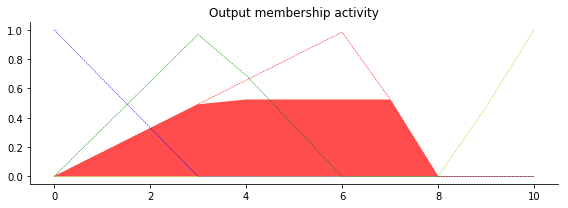

In [0]:
# Visualização


fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_ruim, facecolor='b', alpha=0.7)
ax0.plot(x_tip, mdp_ruim, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_tip, tip0, tip_activation_reg, facecolor='g', alpha=0.7)
ax0.plot(x_tip, mdp_regular, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, tip_activation_bom, facecolor='r', alpha=0.7)
ax0.plot(x_tip, mdp_bom, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, tip_activation_exc, facecolor='r', alpha=0.7)
ax0.plot(x_tip, mdp_excelente, 'y', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity')

# Desative os eixos de cima e da direita

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [0]:
# Agrega todas as três saídas da função de pertinência juntas

aggregated = np.fmax(np.fmax(tip_activation_ruim, tip_activation_reg), np.fmax(tip_activation_bom, tip_activation_exc))

In [0]:
# Calcula o resultado desnebulizado

tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # para a plotagem

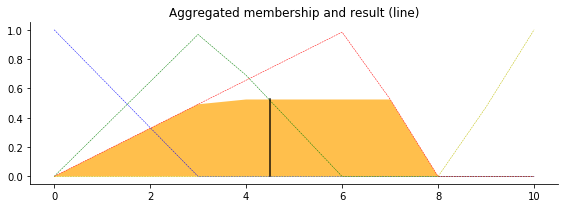

In [0]:
# Visualização

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_ruim, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_regular, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_bom, 'r', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_excelente, 'y', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Desliga os eixos de cima e da direita

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [0]:
mdp = list(data_grad['MDP'])
qrc = list(data_grad['QRC'])

mdp = sum(mdp) / len(mdp)
qrc = sum(qrc) / len(qrc)

### Avaliaçao da Turma

In [0]:
# Precisamos da ativação de nossas funções de pertinência

mdp_level_ruim = fuzz.interp_membership(x_mdp, mdp_ruim, mdp)
mdp_level_reg  = fuzz.interp_membership(x_mdp, mdp_regular, mdp)
mdp_level_bom  = fuzz.interp_membership(x_mdp, mdp_bom, mdp)
mdp_level_exc  = fuzz.interp_membership(x_mdp, mdp_excelente, mdp)

qrc_level_ruim = fuzz.interp_membership(x_qrc, qrc_ruim, qrc)
qrc_level_reg  = fuzz.interp_membership(x_qrc, qrc_regular, qrc)
qrc_level_bom  = fuzz.interp_membership(x_qrc, qrc_bom, qrc)
qrc_level_exc  = fuzz.interp_membership(x_qrc, qrc_excelente, qrc)

In [0]:
# Regra 1: MDP execelente E QRC excelente
tip_activation_exc = np.fmin(mdp_level_exc, qrc_level_exc)

# Regra 2: MDP bom E QRC regular
tip_activation_reg = np.fmin(mdp_level_bom, qrc_level_reg)

# Regra 3: MDP ruim E QRC excelente
tip_activation_ruim = np.fmin(mdp_level_ruim, qrc_level_exc)

# Regra 4: MDP bom
tip_activation_bom = np.fmin(mdp_level_bom, mdp_bom)

tip0 = np.zeros_like(x_tip)

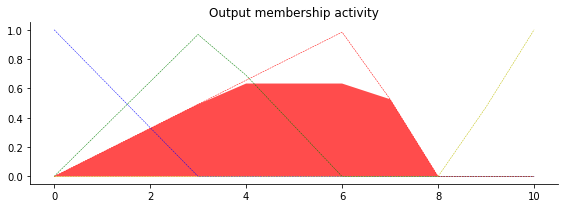

In [0]:
# Visualização


fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_ruim, facecolor='b', alpha=0.7)
ax0.plot(x_tip, mdp_ruim, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_tip, tip0, tip_activation_reg, facecolor='g', alpha=0.7)
ax0.plot(x_tip, mdp_regular, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, tip_activation_bom, facecolor='r', alpha=0.7)
ax0.plot(x_tip, mdp_bom, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_tip, tip0, tip_activation_exc, facecolor='r', alpha=0.7)
ax0.plot(x_tip, mdp_excelente, 'y', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity')

# Desative os eixos de cima e da direita

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [0]:
# Agrega todas as três saídas da função de pertinência juntas

aggregated = np.fmax(np.fmax(tip_activation_ruim, tip_activation_reg), np.fmax(tip_activation_bom, tip_activation_exc))

In [0]:
# Calcula o resultado desnebulizado

tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # para a plotagem

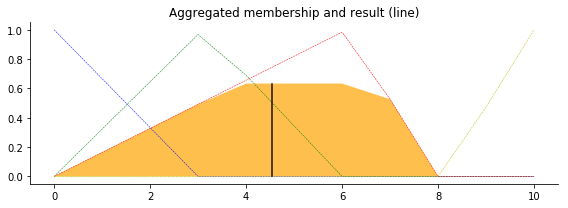

In [0]:
# Visualização

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_ruim, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_regular, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_bom, 'r', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_excelente, 'y', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Desliga os eixos de cima e da direita

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

O gráfico acima expõe as notas das turma, vemos que há uma tendência de haver melhora ao início, e logo se estabiliza ao Regular. Há variações que estavam previstas, mas vemos claramente o patamar entre os valores 0.4 e 0.6.

Comparando com o aluno 1, plotado logo acima desse, vemos que sim, essa tendência refletiu os valores existentes.

Logo, a maior parte dos alunos de Ciência da Computação tende a ser classificados como REGULARES, pelas regras fuzzy que consideramos.

Outra observação importante é que o valor ficou limitado pelo BOM, ou seja, ninguém alcançou o patamar de BOM ou EXCELENTE na média histórica.

#Avaliação dos resultados




A lógica fuzzy é usada para apoio de decisão em sistemas com comportamentos complicados, baseados num sistema esparso de regras definidas. Dado um valor de entrada, a lógica fuzzy é capaz de classificar essa entrada em valores definidos a priori.

Para sistemas de entrada não digital, como sensores de temperatura, o modelo fuzzy é capaz de calcular uma ação, ou indicação de apoio à decisão, baseado nessas entradas calculando-se uma saída nítida. Por exemplo, o sensor capta 36.3° C e diminui a temperatura do ar condicionado para reduzir a temperatura ambiente, a saída poderia ser 22° C (nítida, ou crisp).

No nosso caso, o modelo deve ser capaz de informar, dado as notas, as reprovações e a quantidade de trancamentos, a capacidade de um aluno ser bom num determinado semestre ou em todos os semestre ou demonstrar toda uma turma num dado semestre.



Nosso modelo considerou as seguintes regras: 
>   **( SE o MD foi excelente E QR foi excelente) ENTÃO o aluno será excelente.**

>   **( SE o MD foi bom E QR foi ruim) ENTÃO o aluno será regular.**

>   **( SE o MD foi ruim E QR foi excelente) ENTÃO o aluno será ruim.**

>   **( SE o MD foi bom) ENTÃO o aluno será bom.**

Obs:. MD aqui é definido como a média das médias e QR é a média das das reprovações

O modelo não é treinado, ele somente especifica os intervalos de valores que correspondem às regras nebulosas definidas anteriormente. Os valores que servirão como entrada são classificados nas classes (no nosso modelo: ruim, regular, bom e excelente) e é sugerido uma ação baseado nessa classificação. Dessa forma nosso modelo responde à pergunta proposta no inicio do trabalho, embora seja possível que as regras nebulosas sejam muito pouco restritivas. 

Em relação ao universo, o modelo pode sim ser uma ferramenta utilizável para auxílio à decisão, pois classifica bem os alunos de acordo com as podas que podemos fazer, assim, usar lógica fuzzy é viável para o escopo da proposta, pois o ambiente torna mais fácil o uso, por possibilitar definição de intervalos. 